I - Charger et explorer le jeu de données afin de comprendre sa structure et ses caractéristiques principales.
    
     - Importer le dataset avec pandas

In [1257]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/dataset-diabete.csv')

     - Inspecter la structure des données : colonnes, types, dimensions

In [1258]:
df.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [1259]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33


In [1260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


     - Vérifier les doublons et les valeurs manquantes

In [1261]:
df.duplicated().sum()

np.int64(0)

In [1262]:
df[df.duplicated()]

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age


In [1263]:
df.loc[:, df.columns != "Pregnancies"] = df.loc[:, df.columns != "Pregnancies"].replace(0, np.nan)

df.isnull().sum()
df

C:\Users\reida\AppData\Local\Temp\ipykernel_12056\3408445267.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ nan   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,NaN,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,2.0,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,3.0,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,4.0,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...,...
763,763.0,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,764.0,2,122.0,70.0,27.0,NaN,36.8,0.340,27
765,765.0,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,766.0,1,126.0,60.0,NaN,NaN,30.1,0.349,47


     - Utilise KNN pour remplacer les valeur null
    

In [1264]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  

df_filled = imputer.fit_transform(df)

df = pd.DataFrame(df_filled, columns=df.columns)

     - Analyser la distribution des variables numériques (histogrammes, boxplots).

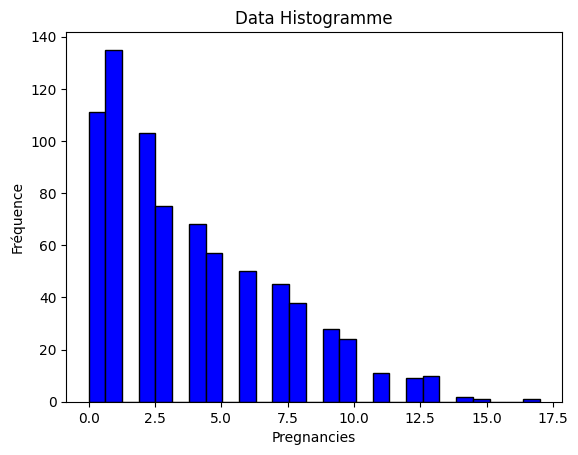

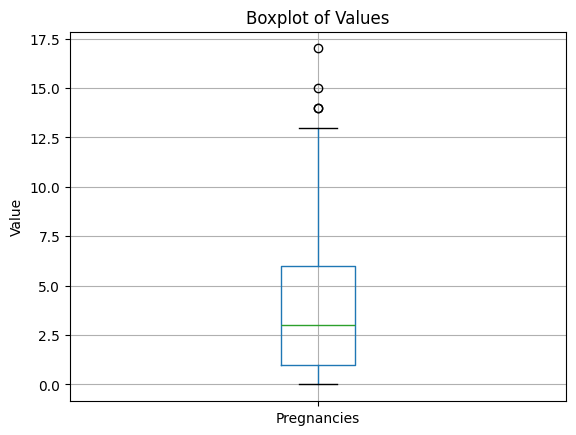

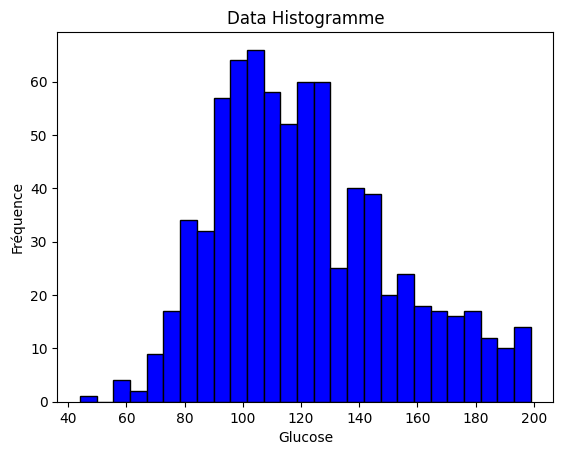

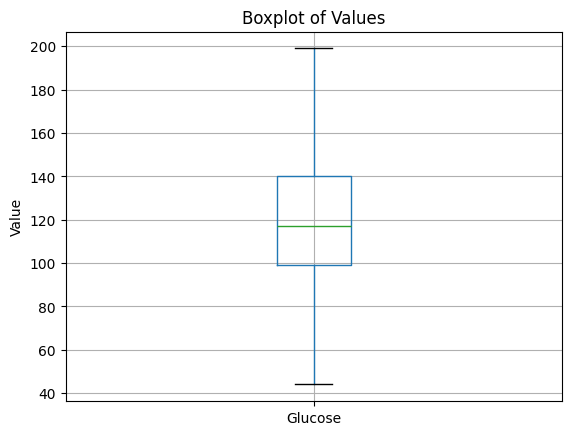

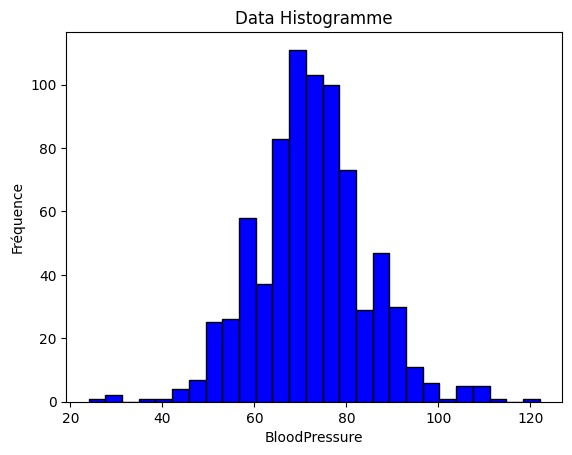

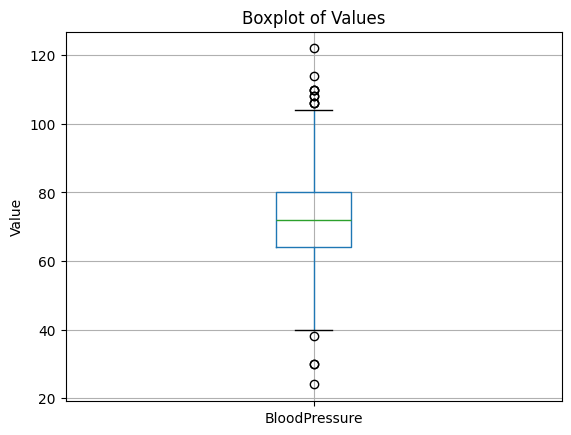

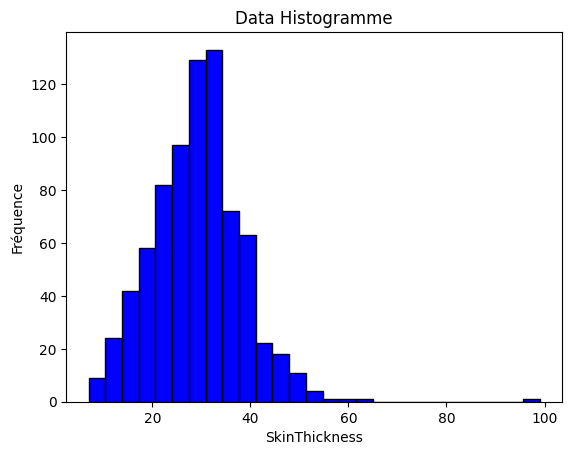

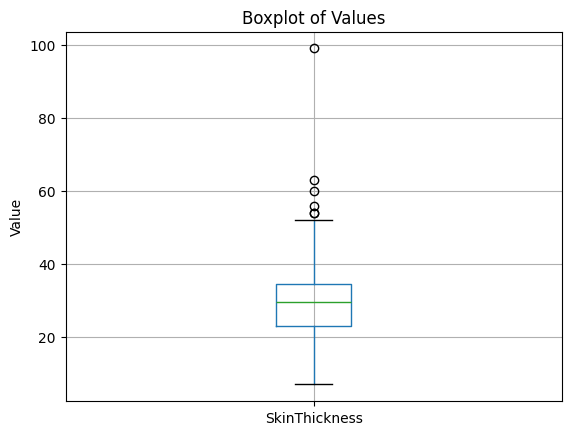

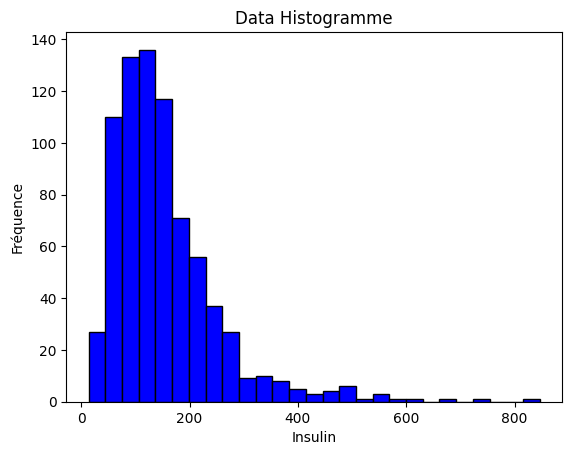

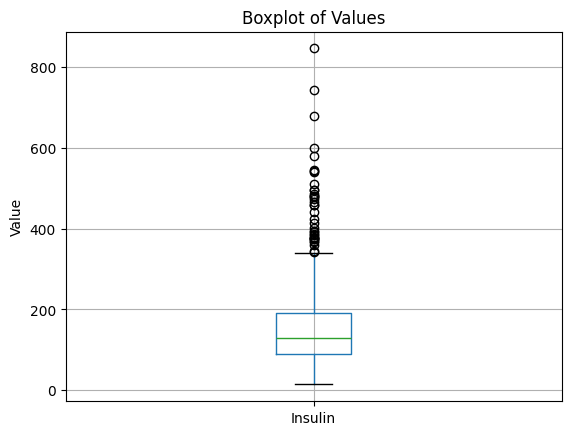

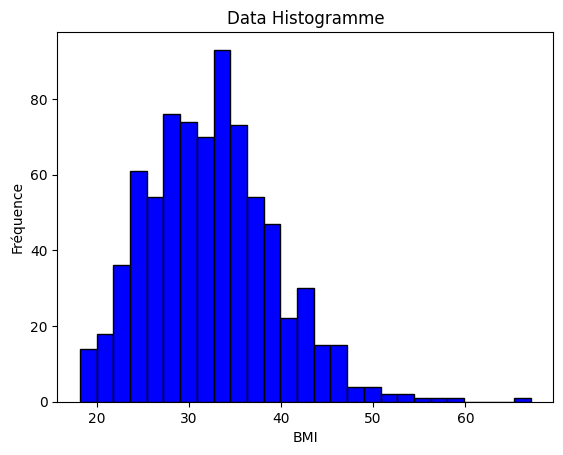

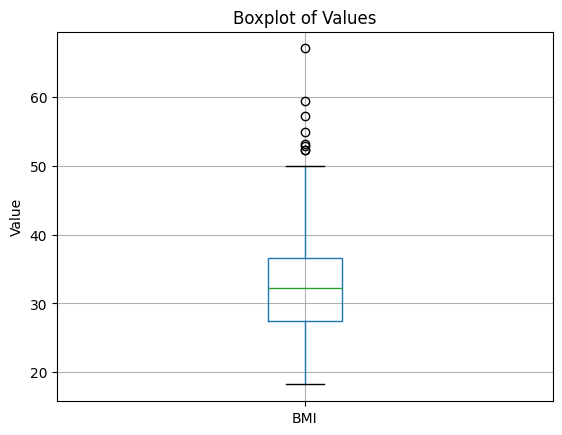

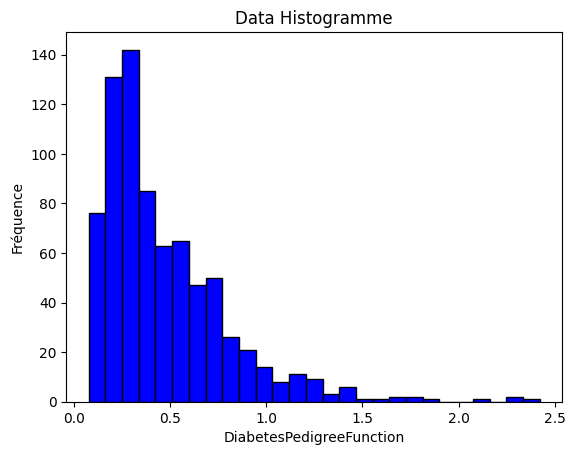

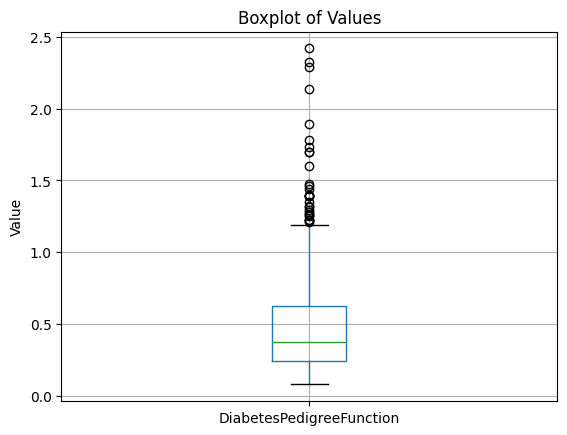

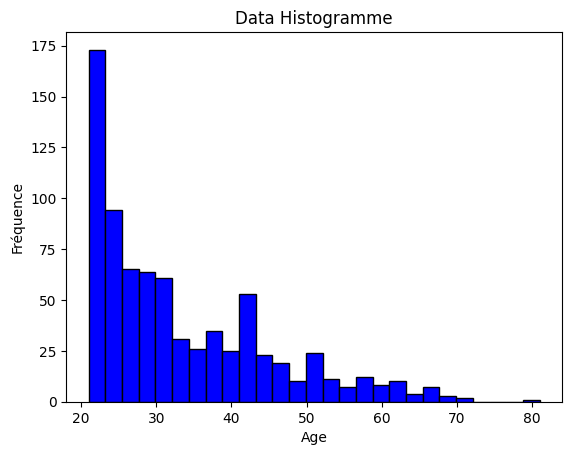

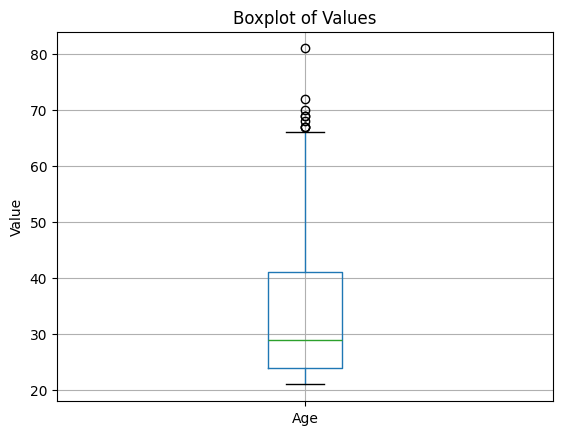

In [1265]:
import matplotlib.pyplot as plt
import math

df = df.drop(columns =["Unnamed: 0" ])

for i in df.columns :

    plt.hist(df[i], bins=int(math.sqrt(df.shape[0])), color='blue', edgecolor='black')
    plt.title("Data Histogramme")
    plt.xlabel(i)
    plt.ylabel("Fréquence")
    plt.show()

    df.boxplot(column=i)
    plt.title("Boxplot of Values")
    plt.ylabel("Value")
    plt.show()


    - Supprimer les valeurs aberrantes

In [1266]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,94.4,26.6,0.351,31.0
2,8.0,183.0,64.0,29.6,375.8,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


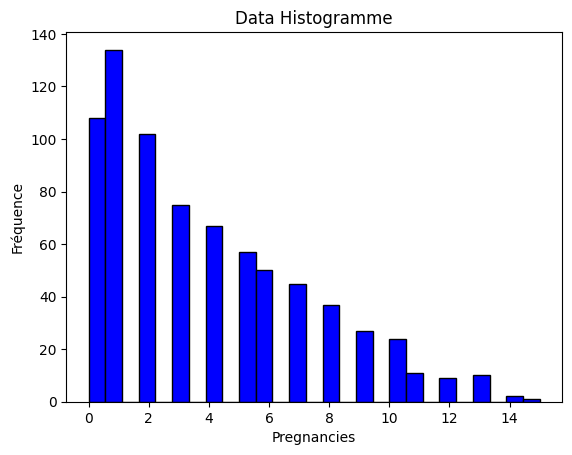

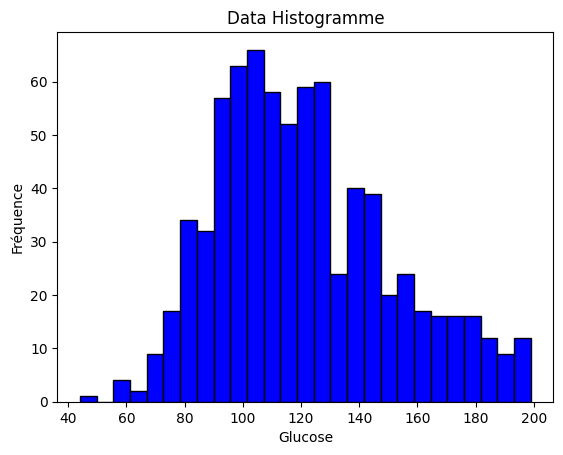

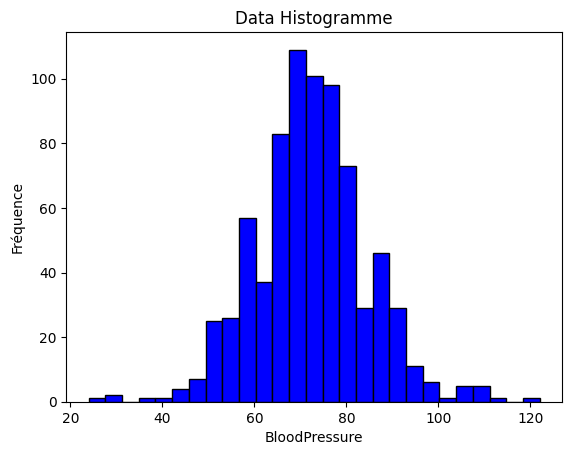

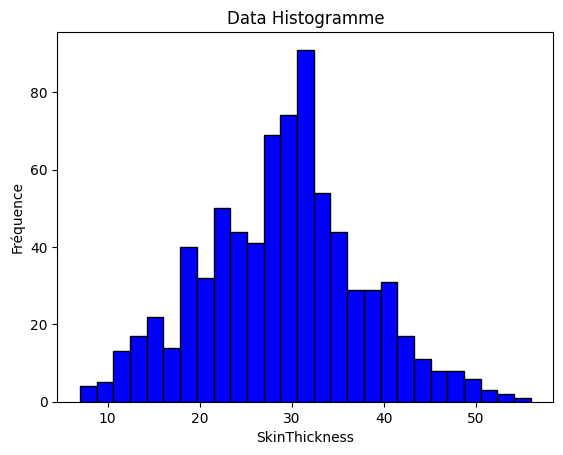

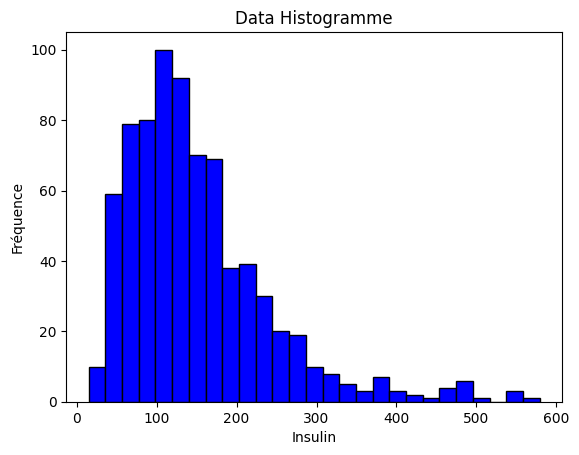

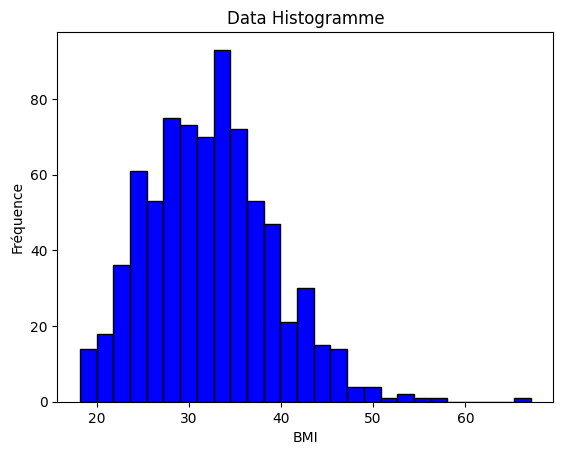

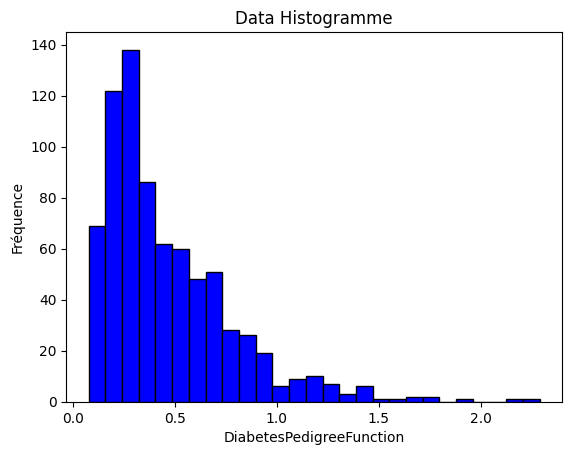

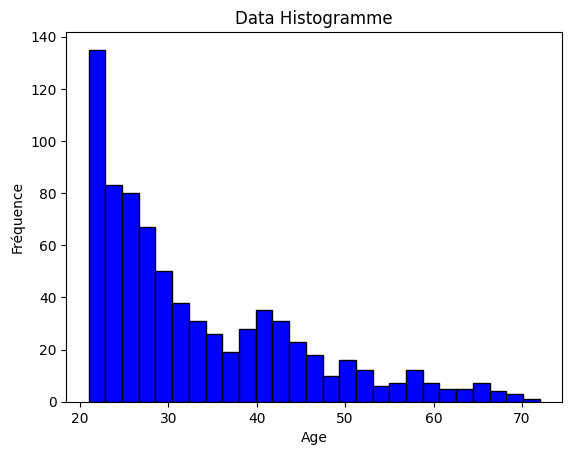

In [1267]:
df_no_outliers = df.copy()

#Pregnancies

Q1 = df_no_outliers["Pregnancies"].quantile(0.25)
Q3 = df_no_outliers["Pregnancies"].quantile(0.75)
IQR = Q3 - Q1
Pregnancies_upper_band = Q3 + 2 * IQR
df_no_outliers = df_no_outliers[(df_no_outliers["Pregnancies"] <= Pregnancies_upper_band)]

#BloodPressure






Q1 = df_no_outliers["SkinThickness"].quantile(0.25)
Q3 = df_no_outliers["SkinThickness"].quantile(0.75)
IQR = Q3 - Q1
SkinThickness_upper_band = Q3 + 2 * IQR

df_no_outliers = df_no_outliers[(df_no_outliers["SkinThickness"] <= SkinThickness_upper_band)]


Q1 = df_no_outliers["Insulin"].quantile(0.25)
Q3 = df_no_outliers["Insulin"].quantile(0.75)
IQR = Q3 - Q1
Insulin_upper_band = Q3 + 4 * IQR

df_no_outliers = df_no_outliers[(df_no_outliers["Insulin"] <= Insulin_upper_band)]

Q1 = df_no_outliers["DiabetesPedigreeFunction"].quantile(0.25)
Q3 = df_no_outliers["DiabetesPedigreeFunction"].quantile(0.75)
IQR = Q3 - Q1
DiabetesPedigreeFunction_upper_band = Q3 + 4.5 * IQR

df_no_outliers = df_no_outliers[(df_no_outliers["DiabetesPedigreeFunction"] <= DiabetesPedigreeFunction_upper_band)]

Q1 = df_no_outliers["Age"].quantile(0.25)
Q3 = df_no_outliers["Age"].quantile(0.75)
IQR = Q3 - Q1
Age_upper_band = Q3 + 2 * IQR

df_no_outliers = df_no_outliers[(df_no_outliers["Age"] <= Age_upper_band)]


for i in df_no_outliers.columns:
        plt.hist(df_no_outliers[i], bins=int(math.sqrt(df_no_outliers.shape[0])), color='blue', edgecolor='black')
        plt.title("Data Histogramme")
        plt.xlabel(i)
        plt.ylabel("Fréquence")
        plt.show()




     - Standardiser les variables numériques

In [1268]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df_scaled = df_no_outliers.copy()
df_scaled = scaler.fit_transform(df_no_outliers)
df_scaled = pd.DataFrame(df_scaled, columns=df_no_outliers.columns, index=df_no_outliers.index)


     - Étudier les corrélations et relations entre variables (Matrice de corrélation , heatmap) et calculer la varience.

In [1269]:
df_scaled.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.133140,0.222750,0.125335,0.106984,0.038633,-0.031399,0.549542
Glucose,0.133140,1.000000,0.239629,0.233011,0.649344,0.227987,0.111642,0.262441
BloodPressure,0.222750,0.239629,1.000000,0.242538,0.162488,0.295643,-0.003219,0.345074
SkinThickness,0.125335,0.233011,0.242538,1.000000,0.264712,0.599574,0.061615,0.170964
Insulin,0.106984,0.649344,0.162488,0.264712,1.000000,0.276168,0.101844,0.194460
BMI,0.038633,0.227987,0.295643,0.599574,0.276168,1.000000,0.119233,0.045506
DiabetesPedigreeFunction,-0.031399,0.111642,-0.003219,0.061615,0.101844,0.119233,1.000000,0.039880
Age,0.549542,0.262441,0.345074,0.170964,0.194460,0.045506,0.039880,1.000000


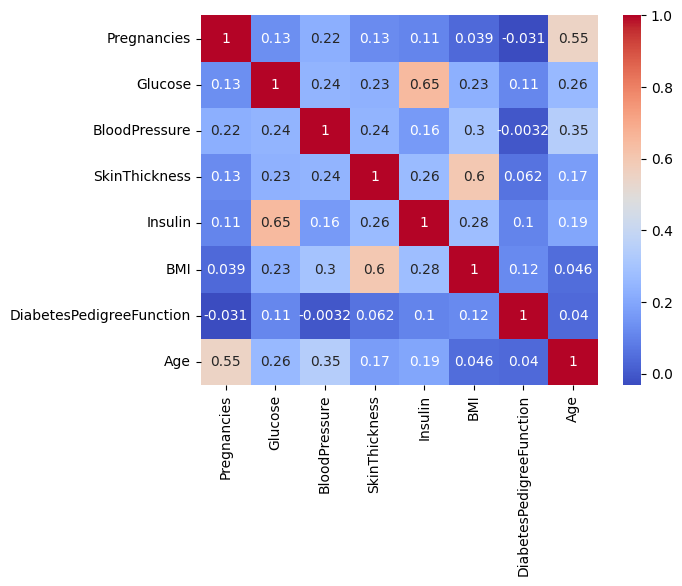

In [1270]:
import seaborn as sns

sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()

In [1271]:
df_scaled.var().sort_values()

BloodPressure               1.001319
Insulin                     1.001319
DiabetesPedigreeFunction    1.001319
Glucose                     1.001319
BMI                         1.001319
Age                         1.001319
SkinThickness               1.001319
Pregnancies                 1.001319
dtype: float64

In [1272]:
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.648919,0.891053,-0.027718,0.688478,0.199295,0.185102,0.508648,1.461499
1,-0.850867,-1.200851,-0.518877,-0.003128,-0.626683,-0.845938,-0.360702,-0.180979
2,1.248834,2.053222,-0.682597,0.066032,2.489003,-1.332000,0.650390,-0.094533
3,-0.850867,-1.068032,-0.518877,-0.694735,-0.631112,-0.625001,-0.940269,-1.045441
4,-1.150824,0.525800,-2.647234,0.688478,0.188223,1.584370,5.740500,-0.008087


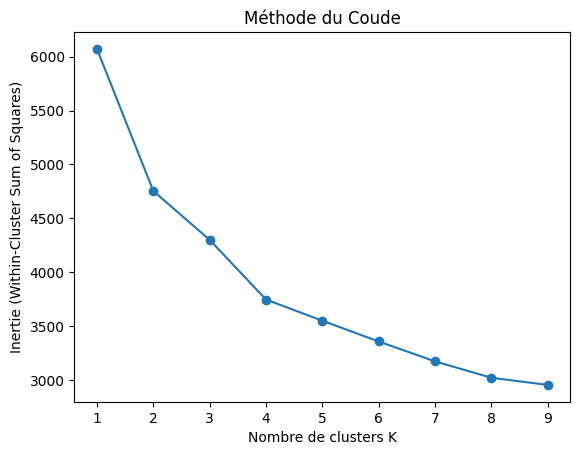

In [1273]:
from sklearn.cluster import KMeans


inertias = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.title("Méthode du Coude")
plt.xlabel("Nombre de clusters K")
plt.ylabel("Inertie (Within-Cluster Sum of Squares)")
plt.show()

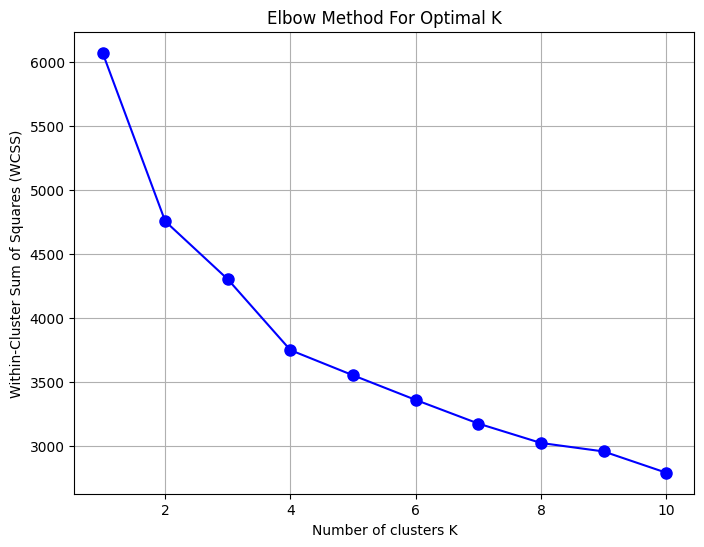

In [1274]:
wcss = []
K_range = range(1, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled) 
    wcss.append(kmeans.inertia_)  


plt.figure(figsize=(8, 6))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters K')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

In [1275]:



from sklearn.metrics import silhouette_score


for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    score = silhouette_score(df_scaled, labels)
    print(f"K = {k}, Silhouette Score = {score}")


K = 2, Silhouette Score = 0.20893443470639483
K = 3, Silhouette Score = 0.15672824754228973
K = 4, Silhouette Score = 0.17691862259368557
K = 5, Silhouette Score = 0.16594997857284086
K = 6, Silhouette Score = 0.15215992637795106
K = 7, Silhouette Score = 0.13315745957334388
K = 8, Silhouette Score = 0.1475412159185377
K = 9, Silhouette Score = 0.13752513947555944


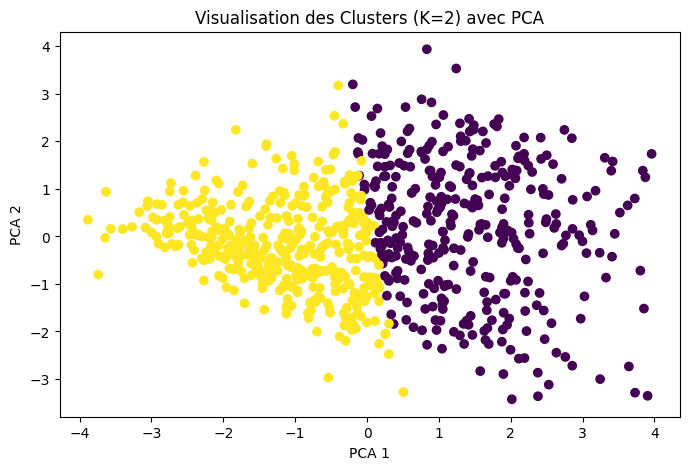

In [1276]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


kmeans = KMeans(n_clusters=2, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled.drop('Cluster', axis=1))

df_scaled['PCA1'] = pca_result[:, 0]
df_scaled['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 5))
plt.scatter(df_scaled['PCA1'], df_scaled['PCA2'], c=df_scaled['Cluster'])
plt.title("Visualisation des Clusters (K=2) avec PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [1277]:
explained_variance = pca.explained_variance_ratio_

print("Variance de PCA1 :", explained_variance[0] * 100, "%")
print("Variance de PCA2 :", explained_variance[1] * 100, "%")
print("Variance totale expliquée :", explained_variance.sum() * 100, "%")


Variance de PCA1 : 32.189741618854605 %
Variance de PCA2 : 17.974767469075744 %
Variance totale expliquée : 50.164509087930355 %


In [1278]:
cluster_means = df_scaled.groupby('Cluster').mean()
cluster_means

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,PCA1,PCA2
Cluster,,,,,,,,,,
0,0.484371,0.580370,0.539314,0.535666,0.538442,0.441490,0.062625,0.624947,1.408523,0.201885
1,-0.414499,-0.496649,-0.461515,-0.458394,-0.460770,-0.377803,-0.053591,-0.534795,-1.205338,-0.172763


In [1279]:
cluster_count = df_scaled['Cluster'].value_counts()
cluster_count

Cluster
1    409
0    350
Name: count, dtype: int64

In [1280]:
scaled_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
               'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

cluster_means_subset = cluster_means[scaled_cols]

cluster_means_original = pd.DataFrame(
    scaler.inverse_transform(cluster_means_subset),
    columns=scaled_cols,
    index=cluster_means_subset.index
)

cluster_means_original

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Cluster,,,,,,,,
0,5.451429,138.643429,78.926857,33.674286,199.630857,35.340686,0.485397,40.322857
1,2.454768,106.207824,66.700733,25.050367,109.384841,29.778289,0.448501,26.907090


In [1284]:
high_risk_cluster = cluster_means[['Glucose', 'BMI', 'DiabetesPedigreeFunction']].mean(axis=1).idxmax() 
print("High Risk Cluster is:", high_risk_cluster)


High Risk Cluster is: 0


In [1285]:
df_scaled['risk_category'] = df_scaled['Cluster'].apply(
    lambda x: 1 if x == high_risk_cluster else 0
)

df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster,PCA1,PCA2,risk_category
0,0.648919,0.891053,-0.027718,0.688478,0.199295,0.185102,0.508648,1.461499,0,1.550833,0.652774,1
1,-0.850867,-1.200851,-0.518877,-0.003128,-0.626683,-0.845938,-0.360702,-0.180979,1,-1.621260,-0.013223,0
2,1.248834,2.053222,-0.682597,0.066032,2.489003,-1.332000,0.650390,-0.094533,0,1.577483,0.252643,1
3,-0.850867,-1.068032,-0.518877,-0.694735,-0.631112,-0.625001,-0.940269,-1.045441,1,-2.124238,-0.262333,0
4,-1.150824,0.525800,-2.647234,0.688478,0.188223,1.584370,5.740500,-0.008087,1,0.507427,-3.278555,0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.848748,-0.669574,0.299722,2.186959,0.321088,0.081998,-0.927670,2.585300,0,2.186507,2.082351,1
764,-0.550909,0.027728,-0.191438,-0.233664,-0.493818,0.656435,-0.395350,-0.526764,1,-0.487568,-0.661362,0
765,0.348962,-0.005477,-0.027718,-0.694735,-0.431815,-0.904854,-0.694583,-0.267425,1,-0.880662,0.850216,0
766,-0.850867,0.160547,-1.010037,0.066032,-0.285663,-0.330418,-0.367002,1.202160,1,-0.357596,0.218428,0
